In [1]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [2]:
hist_data = pd.read_csv('Lai_Historical_Data.csv')
hist_data['Date'] = pd.to_datetime(hist_data['Date'],utc=True)
hist_data = hist_data.set_index('Date')
hist_data.head(20)

,Date.1,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2010-01-04 05:00:00+00:00,2010-01-04 00:00:00-05:00,27.963019,28.178119,27.420967,27.593046,13700400,0.0,0.0
2010-01-05 05:00:00+00:00,2010-01-05 00:00:00-05:00,27.593046,27.670482,27.274698,27.524214,10307700,0.0,0.0
2010-01-06 05:00:00+00:00,2010-01-06 00:00:00-05:00,27.446781,27.532821,27.257493,27.377949,10709500,0.0,0.0
2010-01-07 05:00:00+00:00,2010-01-07 00:00:00-05:00,27.334927,27.412364,27.137036,27.386551,8202100,0.0,0.0
2010-01-08 05:00:00+00:00,2010-01-08 00:00:00-05:00,27.240285,27.481198,27.128434,27.429573,7657500,0.0,0.0
2010-01-11 05:00:00+00:00,2010-01-11 00:00:00-05:00,27.128433,27.309116,26.749856,26.982164,11250500,0.0,0.0
2010-01-12 05:00:00+00:00,2010-01-12 00:00:00-05:00,26.689625,26.775665,26.397088,26.517544,14618300,0.0,0.0
2010-01-13 05:00:00+00:00,2010-01-13 00:00:00-05:00,26.577773,26.990766,26.560566,26.921934,9620600,0.0,0.0
2010-01-14 05:00:00+00:00,2010-01-14 00:00:00-05:00,26.784270,26.827291,26.638001,26.689627,9235600,0.0,0.0


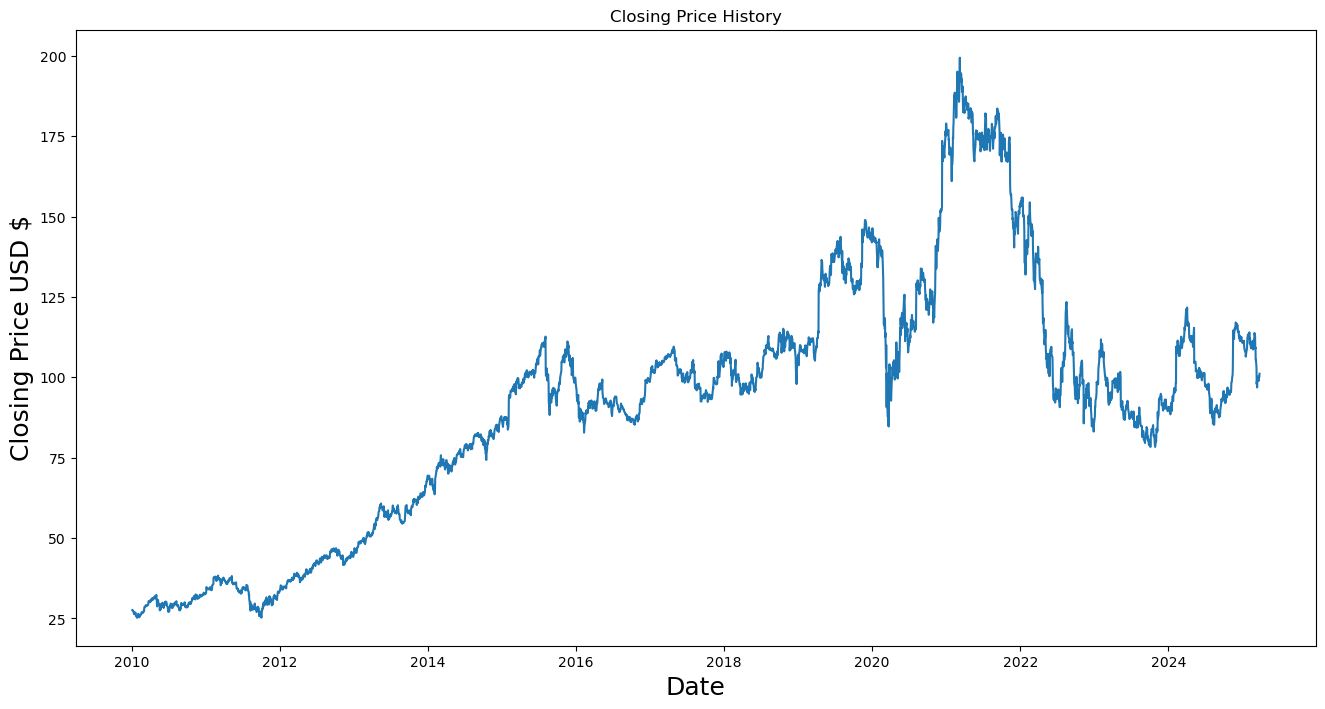

In [3]:
#Visualization of the Closing price
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(hist_data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price USD $", fontsize=18)
plt.show()

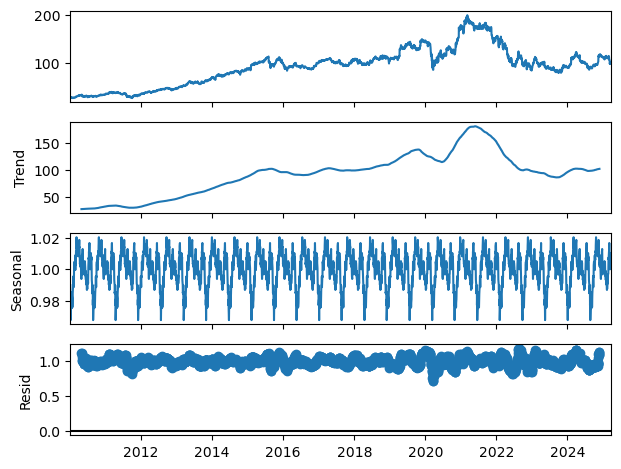

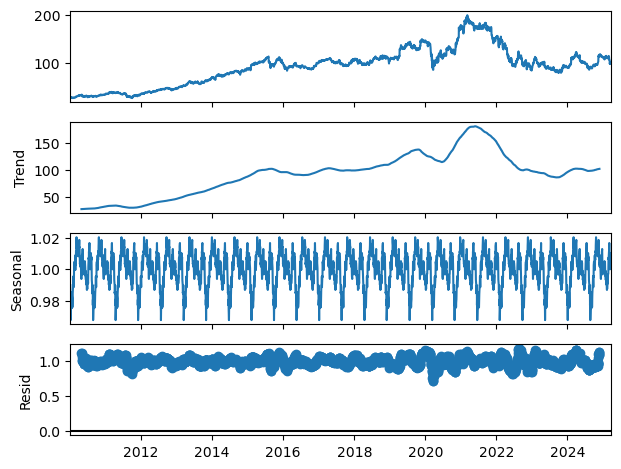

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
#Value = Base Level x Trend x Seasonality x Error
analysis = hist_data[['Close']]
decompose_result_mult = seasonal_decompose(analysis, model="multiplicitive",period = math.ceil(len(analysis)/24))

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()

Text(0.5, 1.0, 'Detrended by dividing the trend line')

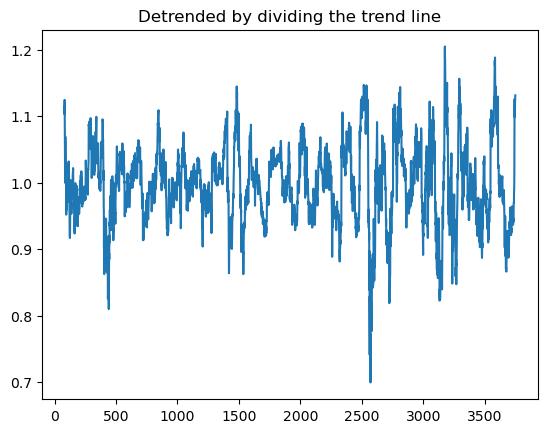

In [5]:
Trend = trend.copy()
Trend.values.shape = (trend.values.shape[0],1)
detrended = analysis.values/Trend.values
plt.plot(detrended)
plt.title('Detrended by dividing the trend line')

Text(0.5, 1.0, 'Deseasonalized by dividing the seaonsalized graph')

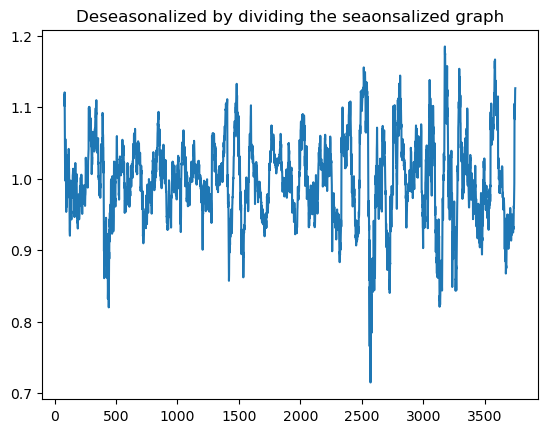

In [6]:
Seasonal = seasonal.copy()
Seasonal.values.shape = (seasonal.values.shape[0],1)
deseasonalized = detrended/Seasonal.values
plt.plot(deseasonalized)

plt.title('Deseasonalized by dividing the seaonsalized graph')

Text(0.5, 1.0, 'Divided the residual')

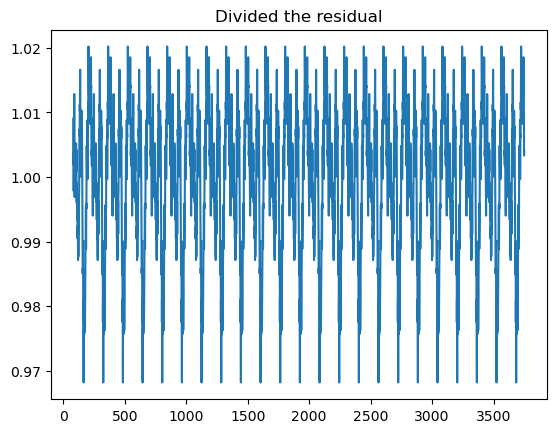

In [7]:
Residual = residual.copy()
Residual.values.shape = (residual.values.shape[0],1)
cyclical = detrended/Residual.values
plt.plot(cyclical)

plt.title('Divided the residual')

<Axes: xlabel='Date'>

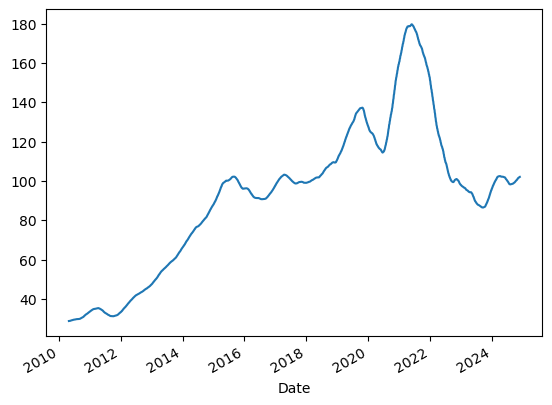

In [8]:
trend.plot()

<Axes: xlabel='Date'>

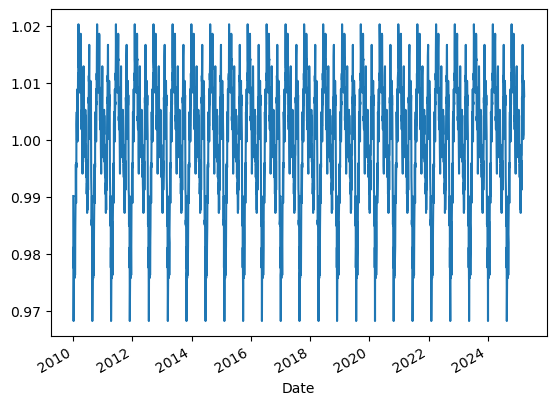

In [9]:
seasonal.plot()

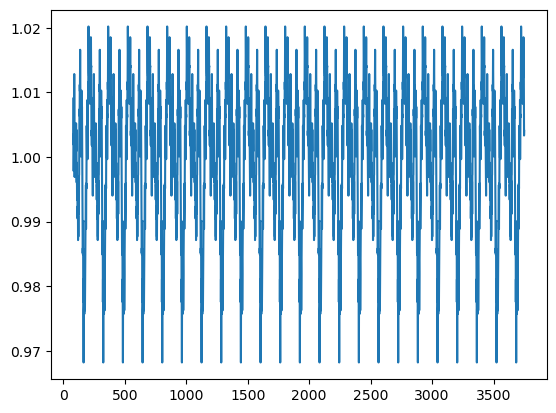

In [10]:
plt.plot(cyclical)

<Axes: xlabel='Date'>

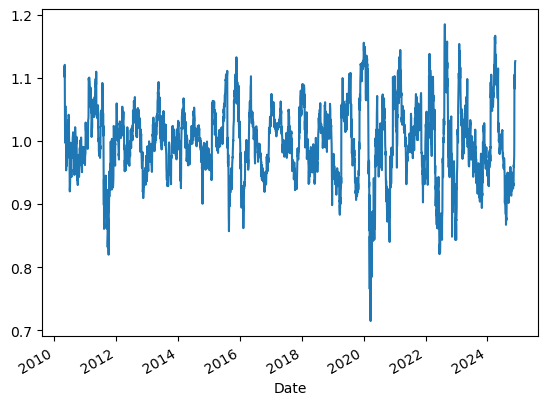

In [11]:
residual.plot()